In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from Classifier import LeastSquares

np.random.seed(12321)
x0 = np.random.normal(size=50).reshape(-1, 2) - 1
x1 = np.random.normal(size=50).reshape(-1, 2) + 1
x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([8., 10.])

train_data ={'2-class': (np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)),
             '2-class_ex': 
             (np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)),
             '3-class':
             (np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int))}

unlike logistic regression, Least squares

- lacks roubustness: highly sensitive to outliers 
- gives poor classification: assign small region to the middle cluster

The failure of least squares should not surprise us when we recall that it corresponds to maximum likelihood under the assumption of a Gaussian conditional distribution, whereas binary target vectors clearly have a distribution that is far from Gaussian.

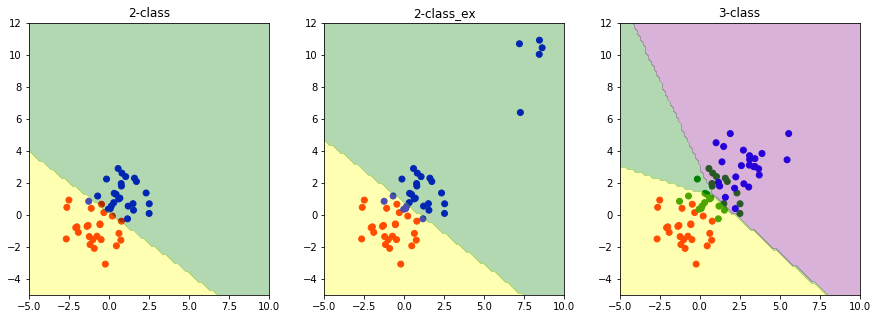

In [2]:
x1_test, x2_test = np.meshgrid(np.linspace(-5, 12, 100), np.linspace(-5, 12, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

plt.figure(figsize=(15, 5))
for i, (key, value) in enumerate(train_data.items()):
    plt.subplot(1, 3, i+1)
    x_train, t_train = value
    t = LeastSquares().fit(x_train, t_train).predict(x_test)
    plt.scatter(x_train[:,0], x_train[:,1], c=t_train, cmap=matplotlib.colors.ListedColormap(['red','green','blue']))
    plt.contourf(x1_test, x2_test, t.reshape(100, 100), alpha=0.3, levels=np.array([0., 0.5, 1.5, 2.]), 
                 cmap=matplotlib.colors.ListedColormap(['yellow','green','purple']))
    plt.xlim(-5, 10)
    plt.ylim(-5, 12)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("{}".format(key))
    
plt.show()